In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd

df = pd.read_csv("/content/drive/My Drive/SeagateModel.csv")

In [0]:
df.failure.value_counts()

0    9991781
1        581
Name: failure, dtype: int64

In [0]:
df.serial_number.nunique()

32164

In [0]:
df['date'] =  pd.to_datetime(df['date'])
df.dtypes

date              datetime64[ns]
serial_number             object
model                     object
capacity_bytes             int64
failure                    int64
smart_5_raw              float64
smart_10_raw             float64
smart_12_raw             float64
smart_184_raw            float64
smart_187_raw            float64
smart_188_raw            float64
smart_189_raw            float64
smart_190_raw            float64
smart_196_raw            float64
smart_197_raw            float64
smart_198_raw            float64
smart_199_raw            float64
smart_200_raw            float64
smart_201_raw            float64
dtype: object

Let's get all the instances where the hard drive fails

In [0]:
df_fails = df[df["failure"]==1]
df_fails.shape

(581, 19)

Failures per month

In [0]:
failure_count = df_fails.groupby(df_fails['date'].dt.strftime('%b')).size()

In [0]:
failure_count.sort_values()

date
Apr    29
Dec    35
Mar    41
Nov    43
Oct    43
Sep    45
Aug    46
Jun    52
May    53
Jul    57
Feb    63
Jan    74
dtype: int64

In [0]:
#Serial Numbers of Failed Drives
serial_withFailure = df_fails["serial_number"]

In [0]:
#Putting it into a list
failure_list = list(serial_withFailure)

In [0]:
#Getting all rows for serial numbers which eventually fail
sure_failure = df[df["serial_number"].isin(failure_list)]

In [0]:
sure_failure.serial_number.nunique()

581

Now we can analyse the trends for some of the serial numbers

In [0]:
sure_failure.tail()

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw,smart_201_raw
9936635,2018-12-29,Z3025L0M,ST4000DM000,4000787030016,0,72.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,26.0,0.0,2.0,647475.0
9941449,2018-12-29,S300VL9M,ST4000DM000,4000787030016,1,0.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,23.0,0.0,1.0,37764.0
9953375,2018-12-30,S300Z61D,ST4000DM000,4000787030016,1,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,16.0,0.0,0.0,38454.0
9955485,2018-12-30,Z302AYKZ,ST4000DM000,4000787030016,1,1856.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,19.0,0.0,0.0,55556.0
9959872,2018-12-30,Z3025L0M,ST4000DM000,4000787030016,1,2424.0,0.0,14.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,26.0,0.0,2.0,647477.0


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters


**Serial Number - S301GMGW**

In [0]:
s1 = sure_failure[sure_failure["serial_number"]=="S301GMGW"]

<Figure size 1584x432 with 0 Axes>

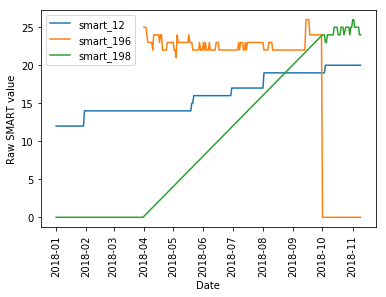

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s1, x="date", y="smart_12_raw", label="smart_12")
sns.lineplot(data=s1, x="date", y="smart_196_raw", label="smart_196")
sns.lineplot(data=s1, x="date", y="smart_198_raw", label="smart_198")
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Raw SMART value")
plt.figure(figsize=(22,6))


<Figure size 1584x432 with 0 Axes>

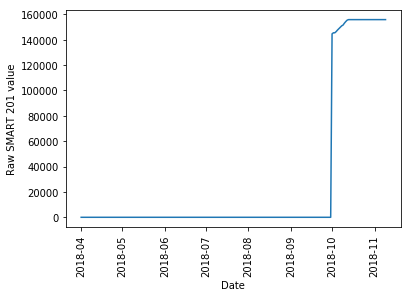

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s1, x="date", y="smart_201_raw")
plt.xticks(rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Raw SMART 201 value")
plt.figure(figsize=(22,6))

**Serial Number - Z300X8BY**

In [0]:
s2 = sure_failure[sure_failure["serial_number"]=="Z300X8BY"]

<Figure size 1584x432 with 0 Axes>

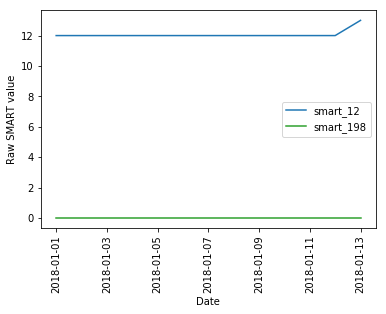

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s2, x="date", y="smart_12_raw", label="smart_12")
sns.lineplot(data=s2, x="date", y="smart_196_raw", label="smart_196")
sns.lineplot(data=s2, x="date", y="smart_198_raw", label="smart_198")
plt.xlabel("Date")
plt.ylabel("Raw SMART value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

<Figure size 1584x432 with 0 Axes>

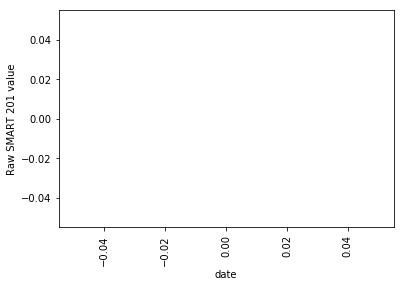

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s2, x="date", y="smart_201_raw")
plt.xticks(rotation='vertical')
plt.ylabel("Raw SMART 201 value")
plt.figure(figsize=(22,6))

**Serial Number - S300VL9M**

In [0]:
s3 = sure_failure[sure_failure["serial_number"]=="S300VL9M"]

<Figure size 1584x432 with 0 Axes>

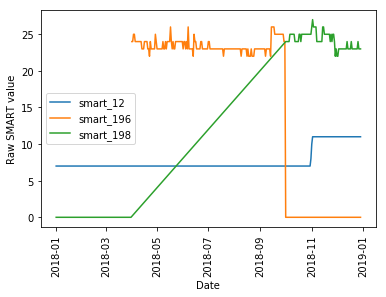

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s3, x="date", y="smart_12_raw", label="smart_12")
sns.lineplot(data=s3, x="date", y="smart_196_raw", label="smart_196")
sns.lineplot(data=s3, x="date", y="smart_198_raw", label="smart_198")
plt.xlabel("Date")
plt.ylabel("Raw SMART value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

<Figure size 1584x432 with 0 Axes>

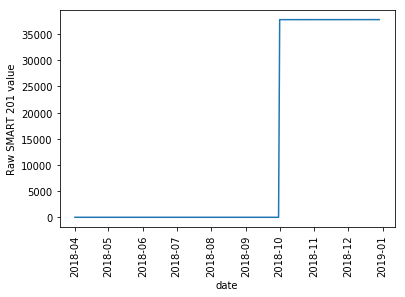

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s3, x="date", y="smart_201_raw")
plt.ylabel("Raw SMART 201 value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

**Serial Number - Z3025L0M**

In [0]:
s4 = sure_failure[sure_failure["serial_number"]=="Z3025L0M"]

<Figure size 1584x432 with 0 Axes>

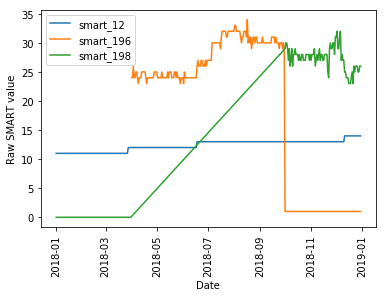

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s4, x="date", y="smart_12_raw", label="smart_12")
sns.lineplot(data=s4, x="date", y="smart_196_raw", label="smart_196")
sns.lineplot(data=s4, x="date", y="smart_198_raw", label="smart_198")
plt.xlabel("Date")
plt.ylabel("Raw SMART value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

<Figure size 1584x432 with 0 Axes>

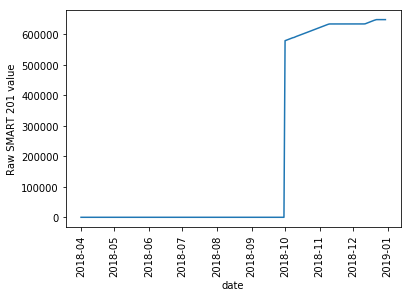

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s4, x="date", y="smart_201_raw")
plt.ylabel("Raw SMART 201 value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

**Serial Number - Z304KR3C**

In [0]:
s5 = sure_failure[sure_failure["serial_number"]=="Z304KR3C"]

<Figure size 1584x432 with 0 Axes>

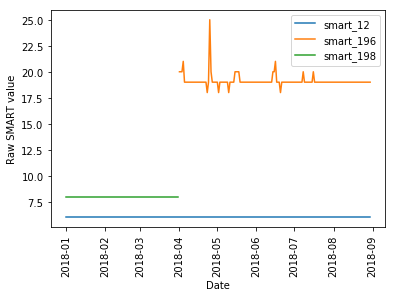

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s5, x="date", y="smart_12_raw", label="smart_12")
sns.lineplot(data=s5, x="date", y="smart_196_raw", label="smart_196")
sns.lineplot(data=s5, x="date", y="smart_198_raw", label="smart_198")
plt.xlabel("Date")
plt.ylabel("Raw SMART value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

<Figure size 1584x432 with 0 Axes>

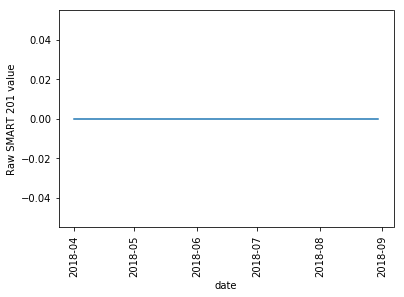

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=s5, x="date", y="smart_201_raw")
plt.ylabel("Raw SMART 201 value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

Note : - 
1. Smart 201 and Smart 196 move from null to numeric values few months before a failure.
2. Smart 199 also shows a small bump in value when Smart 201 and 196 appear.
3. Some of the hardrive have nulls for most of the Smart stats and show no change before failure (Could be due to incorrectly recorded stats)

In [0]:
s1.describe()

,capacity_bytes,failure,smart_5_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw,smart_201_raw
count,3.120000e+02,312.000000,312.0,312.0,312.000000,90.0,273.0,273.0,273.000000,273.000000,222.000000,129.0,129.000000,312.000000,222.000000,222.000000
mean,4.000787e+12,0.003205,0.0,0.0,16.089744,0.0,0.0,0.0,1.186813,8.076923,18.729730,0.0,7.410853,3.923077,5.513514,27014.581081
std,0.000000e+00,0.056614,0.0,0.0,2.585818,0.0,0.0,0.0,2.394442,11.557622,8.705796,0.0,11.307915,16.368560,19.189394,58669.256203
min,4.000787e+12,0.000000,0.0,0.0,12.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,4.000787e+12,0.000000,0.0,0.0,14.000000,0.0,0.0,0.0,0.000000,0.000000,22.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,4.000787e+12,0.000000,0.0,0.0,16.000000,0.0,0.0,0.0,0.000000,0.000000,22.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,4.000787e+12,0.000000,0.0,0.0,19.000000,0.0,0.0,0.0,0.000000,24.000000,23.000000,0.0,24.000000,0.000000,0.000000,0.000000
max,4.000787e+12,1.000000,0.0,0.0,20.000000,0.0,0.0,0.0,6.000000,29.000000,26.000000,0.0,26.000000,72.000000,72.000000,155743.000000


In [0]:
s2.describe()

,capacity_bytes,failure,smart_5_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw,smart_201_raw
count,1.300000e+01,13.000000,13.0,13.0,13.000000,13.0,13.0,13.0,13.0,13.000000,0.0,13.0,13.0,13.0,0.0,0.0
mean,4.000787e+12,0.076923,0.0,0.0,12.076923,0.0,0.0,0.0,9.0,26.461538,NaN,0.0,0.0,0.0,NaN,NaN
std,0.000000e+00,0.277350,0.0,0.0,0.277350,0.0,0.0,0.0,0.0,2.696151,NaN,0.0,0.0,0.0,NaN,NaN
min,4.000787e+12,0.000000,0.0,0.0,12.000000,0.0,0.0,0.0,9.0,19.000000,NaN,0.0,0.0,0.0,NaN,NaN
25%,4.000787e+12,0.000000,0.0,0.0,12.000000,0.0,0.0,0.0,9.0,26.000000,NaN,0.0,0.0,0.0,NaN,NaN
50%,4.000787e+12,0.000000,0.0,0.0,12.000000,0.0,0.0,0.0,9.0,26.000000,NaN,0.0,0.0,0.0,NaN,NaN
75%,4.000787e+12,0.000000,0.0,0.0,12.000000,0.0,0.0,0.0,9.0,29.000000,NaN,0.0,0.0,0.0,NaN,NaN
max,4.000787e+12,1.000000,0.0,0.0,13.000000,0.0,0.0,0.0,9.0,29.000000,NaN,0.0,0.0,0.0,NaN,NaN


In [0]:
s3.describe()

,capacity_bytes,failure,smart_5_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw,smart_201_raw
count,3.620000e+02,362.000000,362.0,362.0,362.000000,90.0,273.0,273.0,273.0,273.000000,272.000000,179.0,179.000000,362.0,272.000000,272.000000
mean,4.000787e+12,0.002762,0.0,0.0,7.651934,0.0,0.0,0.0,0.0,8.142857,15.764706,0.0,12.016760,0.0,0.213235,12356.154412
std,0.000000e+00,0.052559,0.0,0.0,1.473819,0.0,0.0,0.0,0.0,11.648565,11.037163,0.0,12.141245,0.0,0.410347,17750.626091
min,4.000787e+12,0.000000,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,4.000787e+12,0.000000,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,4.000787e+12,0.000000,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,0.000000,23.000000,0.0,0.000000,0.0,0.000000,0.000000
75%,4.000787e+12,0.000000,0.0,0.0,7.000000,0.0,0.0,0.0,0.0,24.000000,23.000000,0.0,24.000000,0.0,0.000000,37760.000000
max,4.000787e+12,1.000000,0.0,0.0,11.000000,0.0,0.0,0.0,0.0,27.000000,26.000000,0.0,27.000000,0.0,1.000000,37764.000000


In [0]:
s4.describe()

,capacity_bytes,failure,smart_5_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw,smart_201_raw
count,3.630000e+02,363.000000,363.000000,363.0,363.000000,90.0,273.0,273.000000,273.0,273.000000,273.000000,180.0,180.000000,363.0,273.000000,273.000000
mean,4.000787e+12,0.002755,7.096419,0.0,12.355372,0.0,0.0,0.329670,0.0,8.648352,18.805861,0.0,13.683333,0.0,0.659341,205517.959707
std,0.000000e+00,0.052486,127.295276,0.0,0.902968,0.0,0.0,0.470957,0.0,10.951806,12.785089,0.0,13.792750,0.0,0.941913,293811.257534
min,4.000787e+12,0.000000,0.000000,0.0,11.000000,0.0,0.0,0.000000,0.0,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,4.000787e+12,0.000000,0.000000,0.0,12.000000,0.0,0.0,0.000000,0.0,1.000000,1.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,4.000787e+12,0.000000,0.000000,0.0,13.000000,0.0,0.0,0.000000,0.0,1.000000,24.000000,0.0,11.500000,0.0,0.000000,0.000000
75%,4.000787e+12,0.000000,0.000000,0.0,13.000000,0.0,0.0,1.000000,0.0,23.000000,30.000000,0.0,28.000000,0.0,2.000000,607456.000000
max,4.000787e+12,1.000000,2424.000000,0.0,14.000000,0.0,0.0,1.000000,0.0,26.000000,34.000000,0.0,32.000000,0.0,2.000000,647477.000000


In [0]:
s5.describe()

,capacity_bytes,failure,smart_5_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw,smart_201_raw
count,2.420000e+02,242.000000,242.000000,242.0,242.0,90.0,242.000000,242.0,242.000000,242.000000,152.000000,90.0,90.0,242.000000,152.000000,152.0
mean,4.000787e+12,0.004132,0.330579,0.0,6.0,0.0,0.008264,0.0,0.400826,7.962810,19.118421,8.0,8.0,5.917355,9.421053,0.0
std,0.000000e+00,0.064282,5.142595,0.0,0.0,0.0,0.128565,0.0,4.119642,10.381652,0.619059,0.0,0.0,14.599259,17.519913,0.0
min,4.000787e+12,0.000000,0.000000,0.0,6.0,0.0,0.000000,0.0,0.000000,0.000000,18.000000,8.0,8.0,0.000000,8.000000,0.0
25%,4.000787e+12,0.000000,0.000000,0.0,6.0,0.0,0.000000,0.0,0.000000,0.000000,19.000000,8.0,8.0,0.000000,8.000000,0.0
50%,4.000787e+12,0.000000,0.000000,0.0,6.0,0.0,0.000000,0.0,0.000000,0.000000,19.000000,8.0,8.0,8.000000,8.000000,0.0
75%,4.000787e+12,0.000000,0.000000,0.0,6.0,0.0,0.000000,0.0,0.000000,21.000000,19.000000,8.0,8.0,8.000000,8.000000,0.0
max,4.000787e+12,1.000000,80.000000,0.0,6.0,0.0,2.000000,0.0,64.000000,25.000000,25.000000,8.0,8.0,224.000000,224.000000,0.0


From the charts and stats we can now reduce the number of stats that can be used:

  Smart 5 - Ignore (Value change after failure)
  
  Smart 10 - Ignore (Value change after failure)
  
 **Smart 12** - Consider (Small increase close to failure)
 
  Smart 184 - Ignore (Null or Zero)
  
  Smart 187 - Ignore (Null or Zero)
  
  Smart 188 - Ignore (Insignificant change)
  
  Smart 189 - Ignore (0 or changes after failure)
  
  Smart 190 - Ignore (mostly null)
  
 **Smart 196** - Consider (Can observe trend in chart)
 
  Smart 197 - Ignore (0 or constant)
  
  **Smart 198** - Consider (Opposite trend of 196 in some cases)
  
  **Smart 199** -  Consider (Jumps up at failure and 196/198 jumps)
  
  Smart 200 - Ignore (Constant and bumps after failure)
  
  **Smart 201** - Consider (Can observe trend from chart)
  

# Let's see the trend for the stats where the hard drive dosen't fail.


In [0]:
#Getting all rows for serial numbers which eventually fail
working = df[~df["serial_number"].isin(failure_list)]

In [0]:
working.tail(20)

,date,serial_number,model,capacity_bytes,failure,smart_5_raw,smart_10_raw,smart_12_raw,smart_184_raw,smart_187_raw,smart_188_raw,smart_189_raw,smart_190_raw,smart_196_raw,smart_197_raw,smart_198_raw,smart_199_raw,smart_200_raw,smart_201_raw
9992342,2018-12-31,S3010LJ0,ST4000DM000,4000787030016,0,0.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,20.0,0.0,0.0,38228.0
9992343,2018-12-31,Z302FZFE,ST4000DM000,4000787030016,0,0.0,0.0,7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,22.0,0.0,0.0,33021.0
9992344,2018-12-31,Z3025297,ST4000DM000,4000787030016,0,0.0,0.0,21.0,NaN,NaN,NaN,NaN,NaN,0.0,1.0,23.0,0.0,4.0,244424.0
9992345,2018-12-31,Z3025296,ST4000DM000,4000787030016,0,0.0,0.0,15.0,NaN,NaN,NaN,NaN,NaN,0.0,5.0,28.0,0.0,1.0,46274.0
9992346,2018-12-31,S300YQFF,ST4000DM000,4000787030016,0,0.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,20.0,0.0,0.0,41515.0
9992347,2018-12-31,Z30271NX,ST4000DM000,4000787030016,0,0.0,0.0,13.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,27.0,0.0,0.0,20359.0
9992348,2018-12-31,S30115KE,ST4000DM000,4000787030016,0,0.0,0.0,24.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,20.0,0.0,0.0,43325.0
9992349,2018-12-31,S30115KF,ST4000DM000,4000787030016,0,0.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,19.0,0.0,0.0,33700.0
9992350,2018-12-31,Z305JHKK,ST4000DM000,4000787030016,0,0.0,0.0,6.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,22.0,0.0,0.0,3640.0
9992351,2018-12-31,Z305BS26,ST4000DM000,4000787030016,0,0.0,0.0,11.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,16.0,0.0,0.0,157297.0


**Serial Number - Z300WG7Z**

In [0]:

su1 = working[working["serial_number"]=="Z300WG7Z"]

<Figure size 1584x432 with 0 Axes>

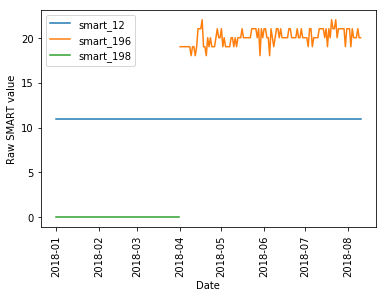

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=su1, x="date", y="smart_12_raw", label="smart_12")
sns.lineplot(data=su1, x="date", y="smart_196_raw", label="smart_196")
sns.lineplot(data=su1, x="date", y="smart_198_raw", label="smart_198")
plt.xlabel("Date")
plt.ylabel("Raw SMART value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))


<Figure size 1584x432 with 0 Axes>

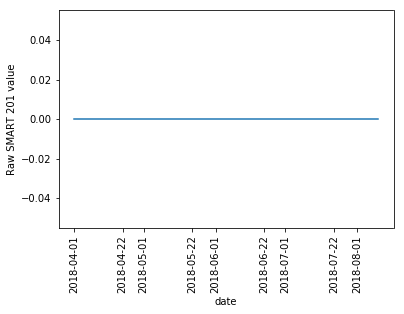

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=su1, x="date", y="smart_201_raw")
plt.ylabel("Raw SMART 201 value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

**Serial Number - S30115KE**

In [0]:
su2 = working[working["serial_number"]=="S30115KE"]

<Figure size 1584x432 with 0 Axes>

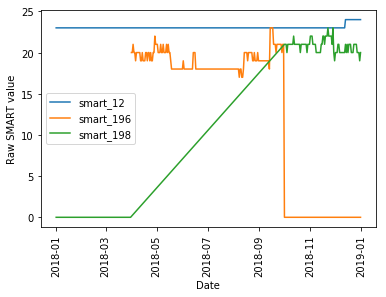

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=su2, x="date", y="smart_12_raw", label="smart_12")
sns.lineplot(data=su2, x="date", y="smart_196_raw", label="smart_196")
sns.lineplot(data=su2, x="date", y="smart_198_raw", label="smart_198")
plt.xlabel("Date")
plt.ylabel("Raw SMART value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

<Figure size 1584x432 with 0 Axes>

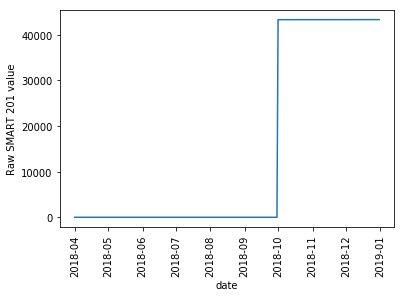

<Figure size 1584x432 with 0 Axes>

In [0]:
sns.lineplot(data=su2, x="date", y="smart_201_raw")
plt.ylabel("Raw SMART 201 value")
plt.xticks(rotation='vertical')
plt.figure(figsize=(22,6))

The stats are most useful once Smart 196, Smart 198 appear. So we can ignore the null values.